# Systems of axial bars

### Example from course reader

[[-2.92397506e-05]
 [ 1.09623444e-04]
 [ 1.39548634e-05]]


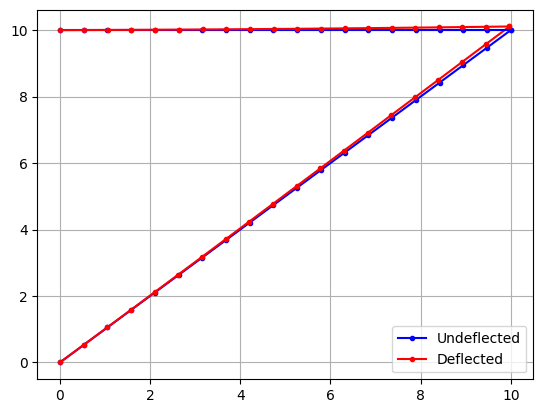

In [3]:
from FEA.FEA import *

A1 = np.array([
    [0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 1, 0], 
    [0, 0, 0, 0, 0, 1],
])

A2 = np.array([
    [0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 1, 0], 
    [0, 0, 0, 0, 0, 1],
])

E = 200e9
L1 = 10
L2 = 10 * 1.41
A = np.pi * (0.1 ** 2) / 4
angle1 = 0
angle2 = 45

element1 = Element(A1, E, 0, L1, A, angle1)
element2 = Element(A2, E, 0, L2, A, angle2)

Q = np.array([
    [0], 
    [100e3],
    [0]
]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

# for element in structure.elements:
#     print(element.global_force)

print(structure.q)

# print(structure.elements[0].local_stiffness_hat)
# print(structure.elements[1].local_stiffness_hat)

nodes = np.array([
    [[0, 0], [10, 10]], 
    [[0, 10], [10, 10]]
])

structure.plot_structure(nodes, 1000, 20)

# Question 3

In [12]:
assembly_mat_1 = np.array([
    [0, 0, 1, 0, 0, 0], 
    [0, 0, 0, 1, 0, 0]
])

assembly_mat_2 = np.array([
    [1, 0, 0, 0, 0, 0], 
    [0, 1, 0, 0, 0, 0]
])

element1 = Element(assembly_mat_1, 200e9, 0, 1.1, 400e-6, 0)
element2 = Element(assembly_mat_2, 200e9, 0, 0.8, 600e-6, 55)

Q = np.array([[0], [-20e3]]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

for element in structure.elements:
    print(element.global_force)

[[ 5.01774335e+00]
 [-3.89115391e+04]
 [-2.85351286e+04]
 [-5.01774335e+00]
 [ 3.89115391e+04]
 [-1.42675643e+04]]
[[ 28535.12864406]
 [-19994.98225665]
 [-13937.3038522 ]
 [-28535.12864406]
 [ 19994.98225665]
 [-13937.3038522 ]]


### choosing a different orientation (different assembly matrices)

In [7]:
assembly_mat_1 = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]])
assembly_mat_2 = np.array([[0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0]])

element1 = Element(assembly_mat_1, 200e9, 0, 1.1, 400e-6, 0)
element2 = Element(assembly_mat_2, 200e9, 0, 0.8, 600e-6, 55)

Q = np.array([
    [0], 
    [-20e3]
]) # external force vector

structure = Structure([element1, element2], Q)

structure.solve()

print(structure.q)

[[ 1.18607460e-08]
 [-7.72285351e-09]]


### Plotting the deformed shape graph

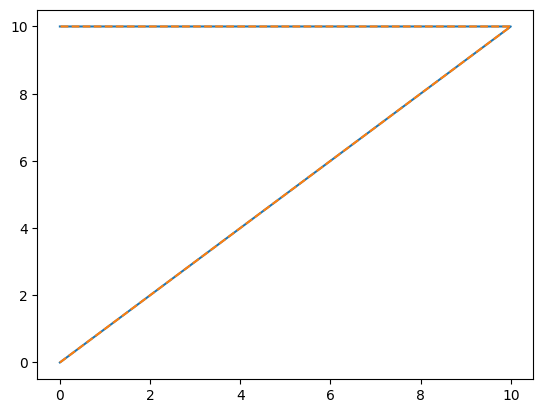

In [9]:
import matplotlib.pyplot as plt

mag = 1000

q1 = structure.q[0][0] * mag
q2 = structure.q[1][0] * mag

points = np.array([[0, 0], [10, 10], [0, 10]])
deflected_points =  np.array([[0, 0], [10 + q1, 10 + q2], [0, 10]])

plt.plot(points[:,0], points[:,1])
plt.plot(deflected_points[:,0], deflected_points[:,1], '--')

plt.show()

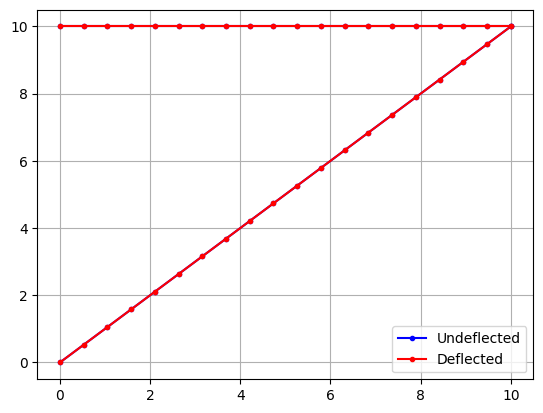

In [6]:
nodes = np.array([
    [[0, 0], [10, 10]], 
    [[10, 10], [0, 10]]
])

structure.plot_structure(nodes, 1000, 20)